# **Flowers recognition project**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print(os.listdir('/content/drive/My Drive/flowers'))

['rose', 'sunflower', 'dandelion', 'daisy', 'tulip']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
daisy='/content/drive/My Drive/flowers/daisy'
sunflower='/content/drive/My Drive/flowers/sunflower'
tulip='/content/drive/My Drive/flowers/tulip'
dandelion='/content/drive/My Drive/flowers/dandelion'
rose='/content/drive/My Drive/flowers/rose'

In [ ]:
def make_label(img,flower_type):
    return flower_type
    
def make_img(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=make_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 175s 7s/step - loss: 1.6297 - accuracy: 0.2735 - val_loss: 1.2940 - val_accuracy: 0.4496
Epoch 2/50
25/25 [==============================] - 173s 7s/step - loss: 1.2414 - accuracy: 0.4696 - val_loss: 1.1969 - val_accuracy: 0.4931
Epoch 3/50
25/25 [==============================] - 173s 7s/step - loss: 1.1241 - accuracy: 0.5448 - val_loss: 1.0627 - val_accuracy: 0.5985
Epoch 4/50
25/25 [==============================] - 173s 7s/step - loss: 1.0353 - accuracy: 0.5770 - val_loss: 1.0492 - val_accuracy: 0.5985
Epoch 5/50
25/25 [==============================] - 173s 7s/step - loss: 0.9835 - accuracy: 0.6066 - val_loss: 1.0254 - val_accuracy: 0.5893
Epoch 6/50
25/25 [==============================] - 174s 7s/step - loss: 0.9441 - accuracy: 0.6236 - val_loss: 1.0049 - val_accuracy: 0.6105
Epoch 7/50
25/25 [==============================] - 174s 7s/step - loss: 0.9123 - accuracy: 0.6357 - val_loss: 0.9199 - val_accuracy: 0.6485
Epoch 8/50
25

In [ ]:
i=0
prop_class=[]
mis_class=[]
pred=model.predict(x_test)    
pred_digits=np.argmax(pred,axis=1)    

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break
i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

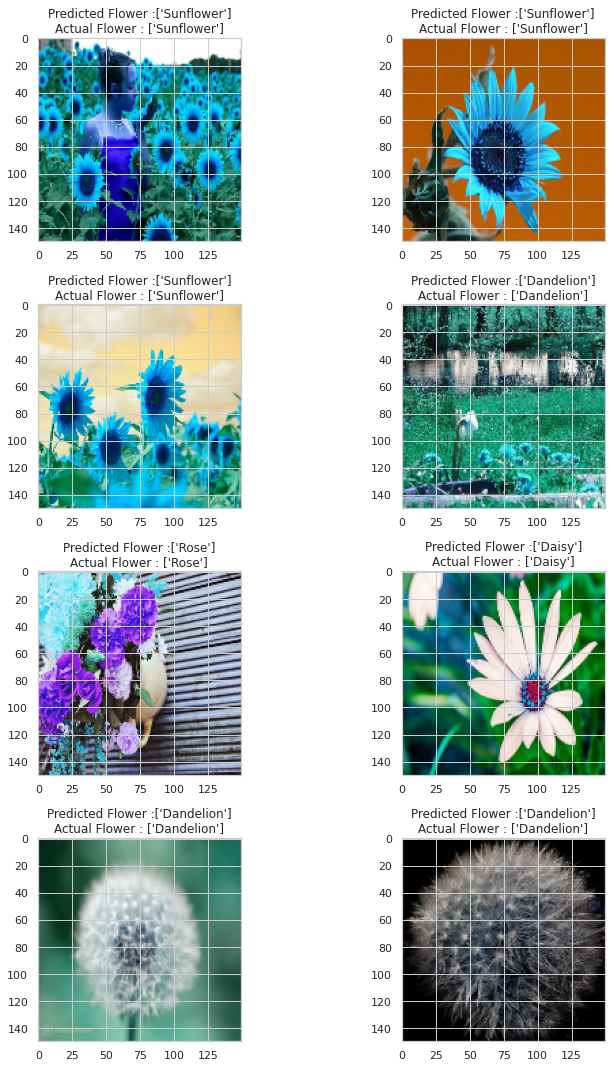

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower :"
                          +str(le.inverse_transform([pred_digits[prop_class[count]]]))
                          +"\n"+"Actual Flower : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])]))
                         )
                         )
        plt.tight_layout()
        count+=1

## **VGG19**

In [ ]:
import cv2
from tensorflow import keras
from random import shuffle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,ZeroPadding2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.applications import VGG19
from keras.utils.vis_utils import plot_model
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


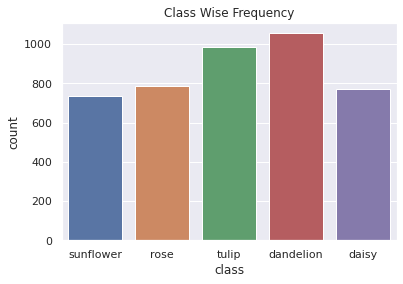

In [ ]:
sns.countplot('class',data=df)
plt.title('Class Wise Frequency')
plt.show()

In [ ]:
mapping={'sunflower':0,'tulip':1,'dandelion':2,'rose':3,'daisy':4}

In [ ]:
df['class'].value_counts()
classes=df['class'].value_counts().index
df.shape

(4326, 2)

In [ ]:
min_width=float('inf')
min_height=float('inf')

for index,row in df.iterrows():
    img=cv2.imread(row['path'])
    
    try:
        min_width=min(min_width,img.shape[0])
        min_height=min(min_height,img.shape[1])
    except:
        print('Not an image file at index:',index)
        df.drop(index=index,inplace=True)
    
print('minimum image width:',min_width,'minimum image height:',min_height)

In [ ]:
IMG_SIZE=80 
CHANNELS=3

def get_data(df,width,height):
    
    data=[]
    
    for index,row in df.iterrows():
        img=cv2.imread(row['path'])
        label=row['class']
        img=cv2.resize(img,(width,height))
        data.append([np.array(img),label])
    return data
data=get_data(df,width=IMG_SIZE,height=IMG_SIZE)

In [ ]:
data[0][0].shape

(80, 80, 3)

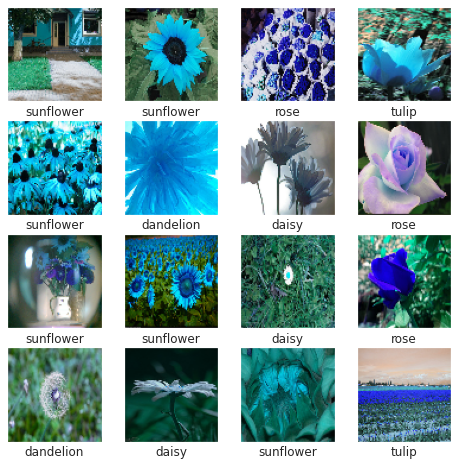

In [ ]:
rows=4
cols=4

fig=plt.figure(figsize=(8,8))

for index in range(1,rows*cols+1):
    flower_img=data[index-1][0]
    flower_class=data[index-1][1]
    
    axis=fig.add_subplot(rows,cols,index)
    axis.set_xticks([]) 
    axis.set_yticks([])
    plt.xlabel(flower_class)
    plt.imshow(flower_img)
plt.show()

In [ ]:
X=[]
Y=[]

for elem in data:
    X.append(elem[0])
    Y.append(mapping.get(elem[1]))
    
X=np.array(X)
Y=np.array(Y)


X=X/255.0

In [ ]:
Y = to_categorical(Y,num_classes = 5)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0)
x_train,x_validate,y_train,y_validate=train_test_split(x_train,y_train,random_state=0)

    model = Sequential()
    # 1st Convolutional Layer
    model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (img_size,img_size,channels)))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    # 2nd Convolutional Layer
    model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=1024, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(1024,activation="relu"))
    model.add(Dropout(0.5))
    # Add output layer
    model.add(Dense(5,activation="softmax"))

   
model=cnn_model_1(img_size=IMG_SIZE,channels=CHANNELS)

In [ ]:
x_train.shape,x_validate.shape,y_train.shape,y_validate.shape

((2431, 80, 80, 3), (811, 80, 80, 3), (2431, 5), (811, 5))

In [ ]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_validate,y_validate))

Epoch 1/20
76/76 [==============================] - 191s 3s/step - loss: 1.8941 - accuracy: 0.2448 - val_loss: 1.3108 - val_accuracy: 0.4007
Epoch 2/20
76/76 [==============================] - 189s 2s/step - loss: 1.2186 - accuracy: 0.4865 - val_loss: 1.1118 - val_accuracy: 0.5487
Epoch 3/20
76/76 [==============================] - 189s 2s/step - loss: 1.0431 - accuracy: 0.5552 - val_loss: 1.1156 - val_accuracy: 0.6116
Epoch 4/20
76/76 [==============================] - 191s 3s/step - loss: 0.9571 - accuracy: 0.6266 - val_loss: 0.9258 - val_accuracy: 0.6510
Epoch 5/20
76/76 [==============================] - 189s 2s/step - loss: 0.8020 - accuracy: 0.6808 - val_loss: 0.8921 - val_accuracy: 0.6720
Epoch 6/20
76/76 [==============================] - 189s 2s/step - loss: 0.7481 - accuracy: 0.7082 - val_loss: 1.0834 - val_accuracy: 0.5919
Epoch 7/20
76/76 [==============================] - 189s 2s/step - loss: 0.6929 - accuracy: 0.7352 - val_loss: 0.9834 - val_accuracy: 0.6634
Epoch 8/20
76

In [ ]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100))

34/34 [==============================] - 12s 357ms/step - loss: 1.7599 - accuracy: 0.7031
Test Accuracy: 70.31%


## **VGG19**

In [ ]:
pretrained_model = VGG19(input_shape = (IMG_SIZE, IMG_SIZE, CHANNELS), include_top = False, weights = 'imagenet')

In [ ]:
pretrained_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0     

In [ ]:
for layer in pretrained_model.layers[:19]:
    layer.trainable = False

model = Sequential(
    [
        pretrained_model,
        Dense(1024,activation='relu'),
        Flatten(),
        Dense(5, activation = 'softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
dense_4 (Dense)              (None, 2, 2, 1024)        525312    
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 20485     
Total params: 20,570,181
Trainable params: 5,265,413
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
x_train.shape,y_train.shape,x_validate.shape,y_validate.shape,x_test.shape,y_test.shape

((2431, 80, 80, 3),
 (2431, 5),
 (811, 80, 80, 3),
 (811, 5),
 (1081, 80, 80, 3),
 (1081, 5))

In [ ]:
history = model.fit(datagen.flow(x_train,y_train), epochs = 20, validation_data =(x_validate,y_validate))

Epoch 1/20
76/76 [==============================] - 188s 2s/step - loss: 1.5367 - accuracy: 0.3280 - val_loss: 1.1130 - val_accuracy: 0.5734
Epoch 2/20
76/76 [==============================] - 188s 2s/step - loss: 0.9613 - accuracy: 0.6305 - val_loss: 0.7840 - val_accuracy: 0.7164
Epoch 3/20
76/76 [==============================] - 185s 2s/step - loss: 0.7997 - accuracy: 0.6945 - val_loss: 0.7456 - val_accuracy: 0.7349
Epoch 4/20
76/76 [==============================] - 186s 2s/step - loss: 0.7624 - accuracy: 0.7125 - val_loss: 0.7326 - val_accuracy: 0.7460
Epoch 5/20
76/76 [==============================] - 185s 2s/step - loss: 0.6829 - accuracy: 0.7502 - val_loss: 0.7013 - val_accuracy: 0.7386
Epoch 6/20
76/76 [==============================] - 184s 2s/step - loss: 0.6596 - accuracy: 0.7567 - val_loss: 0.7073 - val_accuracy: 0.7608
Epoch 7/20
76/76 [==============================] - 184s 2s/step - loss: 0.6736 - accuracy: 0.7462 - val_loss: 0.7345 - val_accuracy: 0.7411
Epoch 8/20
76

In [ ]:
print('Test Accuracy:',model.evaluate(x_test,y_test)[1]*100,'%')

34/34 [==============================] - 50s 1s/step - loss: 0.6968 - accuracy: 0.7845
Test Accuracy: 78.44588160514832 %


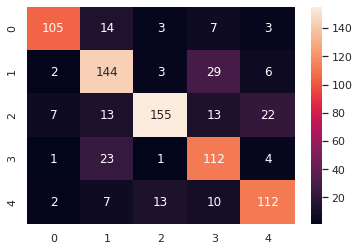

In [ ]:
y_validate_labels,y_validate_prediction_labels=get_prediction_labels(model,x_validate,y_validate)
conf_matrix=confusion_matrix(y_validate_labels,y_validate_prediction_labels)
sns.heatmap(conf_matrix,annot=True,fmt='g')
plt.show()

In [ ]:
print(classification_report(y_validate_labels,y_validate_prediction_labels))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       132
           1       0.72      0.78      0.75       184
           2       0.89      0.74      0.81       210
           3       0.65      0.79      0.72       141
           4       0.76      0.78      0.77       144

    accuracy                           0.77       811
   macro avg       0.78      0.78      0.78       811
weighted avg       0.79      0.77      0.78       811

